19.23124978065491
22.79303512096405
19.82685319900513
21.181211819648745
19.894821681976318


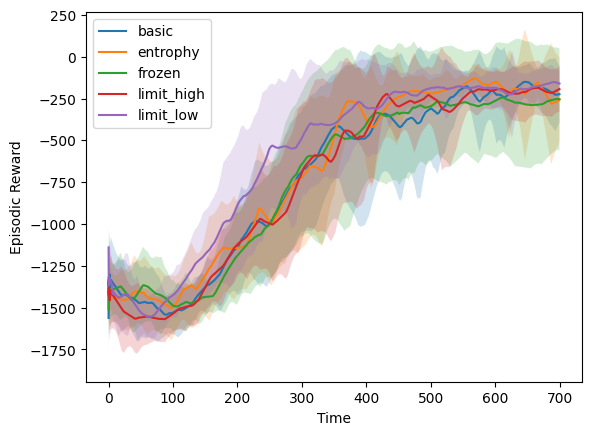

In [23]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

file_list=['list_to_csv_basic-50-tot.csv','list_to_csv_entropy-50-tot.csv','list_to_csv_frozen-50-tot.csv','list_to_csv_limit_high-50-tot.csv','list_to_csv_limit_low-50-tot.csv']
labels_list=['basic','entrophy','frozen','limit_high','limit_low']

file_numbers=len(file_list)
mean_list=[]
std_list=[]
for file_number in range(file_numbers):
  index_load= []
  item_load = []
  with open(file_list[file_number],'r',newline='') as f:
      reader = csv.reader(f)
      data_list=[row for row in reader]
      n=len(data_list)//2
      # 두 개의 리스트를 한 번에 불러오기
      for i in range(0, len(data_list), 2):
        index_load.append(data_list[i])
        item_load.append(data_list[i+1])

  df=pd.DataFrame()
  sum_of_time=0
  for i in range(n):
    index=pd.to_datetime(index_load[i])
    series=pd.Series(item_load[i], index=index)
    series=series.resample('0.1S').mean()
    new_df=df._append(series.interpolate(method='linear'), ignore_index=True)
    df=new_df

    dT=pd.to_datetime(index_load[0][-1]).timestamp()
    dt = datetime(2023, 7, 11, 00, 0, 0).timestamp()
    sum_of_time+=dT-dt

  print(sum_of_time/50/n)
  # df = df.dropna(axis=1)

  mean_list.append(np.array(df.mean()))
  std_list.append(np.array(df.std()))


x=7000
for list_i in mean_list:
  x=min(len(list_i),x)
x=np.arange(0,0.1*x,0.1)

for file_number in range(file_numbers):
  y_num=min(len(mean_list[file_number]),len(x))
  plt.plot(x[:y_num], mean_list[file_number][:y_num], label=labels_list[file_number])
  plt.fill_between(x[:y_num], mean_list[file_number][:y_num] - std_list[file_number][:y_num], mean_list[file_number][:y_num] + std_list[file_number][:y_num], alpha=0.2)

plt.xlabel("Time")
plt.ylabel("Episodic Reward")
plt.legend()
plt.show()

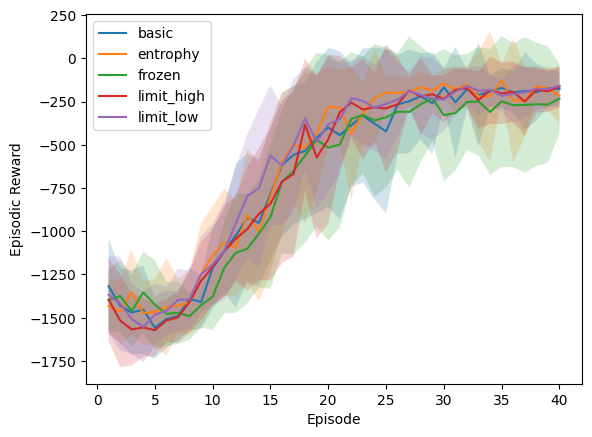

In [24]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

file_list=['list_to_csv_basic-50-tot.csv','list_to_csv_entropy-50-tot.csv','list_to_csv_frozen-50-tot.csv','list_to_csv_limit_high-50-tot.csv','list_to_csv_limit_low-50-tot.csv']
labels_list=['basic','entrophy','frozen','limit_high','limit_low']

file_numbers=len(file_list)
mean_list=[]
std_list=[]
for file_number in range(file_numbers):
  index_load= []
  item_load = []
  with open(file_list[file_number],'r',newline='') as f:
      reader = csv.reader(f)
      data_list=[row for row in reader]
      # 두 개의 리스트를 한 번에 불러오기
      for i in range(0, len(data_list), 2):
        index_load.append(data_list[i])
        item_load.append(data_list[i+1])

  mean_list.append(np.mean(np.array(item_load).astype("float"), axis=0))
  std_list.append(np.std(np.array(item_load).astype("float"), axis=0))


ep=40
for list_i in mean_list:
  ep=min(len(list_i),ep)
ep=np.arange(1, ep + 1, 1)

for file_number in range(file_numbers):
  plt.plot(ep, mean_list[file_number][:40], label=labels_list[file_number])
  plt.fill_between(ep, mean_list[file_number][:40] - std_list[file_number][:40], mean_list[file_number][:40] + std_list[file_number][:40], alpha=0.2)

plt.xlabel("Episode")
plt.ylabel("Episodic Reward")
plt.legend()
plt.show()

구글 코랩(colab)은 90분 동안 아무런 interaction이 없는 경우 연결이 끊겨버리고 학습이 중단될수 있다.

이런 경우를 방지하는 방법은 90분안에 아무 interaction을 하면 될것이다.

F12를 누르거나 Ctrl+shift+i를 누르면 개발자 콘솔이 나타난다.

개발자 콘솔 가장 밑에 코드를 입력할 수 있는 창이있다. 이곳에 아래 JS 코드를 입력하면 된다.



```
function ClickConnect()
{
console.log("Working");
document.querySelector("colab-connect-button").shadowRoot.getElementById('connect').click();
}
setInterval(ClickConnect,1800000);
```



1분마다 ClickConnect() 함수를 실행시킨다.